Epoch: 0050 cost= 0.128340900 W= 0.37637615 b= -0.110598
Epoch: 0100 cost= 0.122403890 W= 0.36883578 b= -0.05635314
Epoch: 0150 cost= 0.117152706 W= 0.36174393 b= -0.005334536
Epoch: 0200 cost= 0.112508148 W= 0.35507375 b= 0.042649746
Epoch: 0250 cost= 0.108400218 W= 0.34880033 b= 0.08778019
Epoch: 0300 cost= 0.104766890 W= 0.34290007 b= 0.1302266
Epoch: 0350 cost= 0.101553373 W= 0.3373506 b= 0.17014867
Epoch: 0400 cost= 0.098711222 W= 0.33213124 b= 0.20769621
Epoch: 0450 cost= 0.096197538 W= 0.32722232 b= 0.24301066
Epoch: 0500 cost= 0.093974352 W= 0.3226055 b= 0.27622446
Epoch: 0550 cost= 0.092008129 W= 0.31826302 b= 0.30746338
Epoch: 0600 cost= 0.090269178 W= 0.31417894 b= 0.3368441
Epoch: 0650 cost= 0.088731326 W= 0.31033778 b= 0.36447725
Epoch: 0700 cost= 0.087371230 W= 0.3067249 b= 0.39046776
Epoch: 0750 cost= 0.086168431 W= 0.30332702 b= 0.41491175
Epoch: 0800 cost= 0.085104741 W= 0.3001313 b= 0.43790162
Epoch: 0850 cost= 0.084164053 W= 0.29712552 b= 0.45952508
Epoch: 0900 cost=

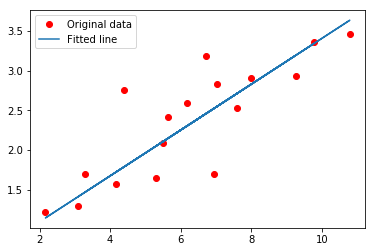

Testing... (Mean square loss Comparison)
Testing cost= 0.0767842
Absolute mean square loss difference: 0.0051618814


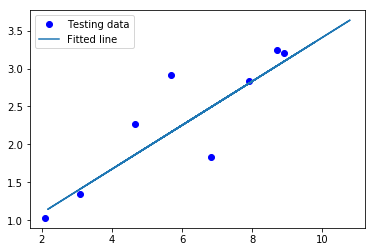

In [2]:
from __future__ import print_function



import tensorflow as tf

import numpy
%matplotlib inline
import matplotlib.pyplot as plt

rng = numpy.random



# Parameters

learning_rate = 0.01

training_epochs = 1000

display_step = 50



# Training Data

train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,

                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])

train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,

                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

n_samples = train_X.shape[0]



# tf Graph Input

X = tf.placeholder("float")

Y = tf.placeholder("float")



# Set model weights

W = tf.Variable(rng.randn(), name="weight")

b = tf.Variable(rng.randn(), name="bias")



# Construct a linear model

pred = tf.add(tf.multiply(X, W), b)



# Mean squared error

cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

# Gradient descent

#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)



# Initialize the variables (i.e. assign their default value)

init = tf.global_variables_initializer()



# Start training

with tf.Session() as sess:



    # Run the initializer

    sess.run(init)



    # Fit all training data

    for epoch in range(training_epochs):

        for (x, y) in zip(train_X, train_Y):

            sess.run(optimizer, feed_dict={X: x, Y: y})



        # Display logs per epoch step

        if (epoch+1) % display_step == 0:

            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})

            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \

                "W=", sess.run(W), "b=", sess.run(b))



    print("Optimization Finished!")

    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})

    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')



    # Graphic display

    plt.plot(train_X, train_Y, 'ro', label='Original data')

    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')

    plt.legend()

    plt.show()



    # Testing example, as requested (Issue #2)

    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])

    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])



    print("Testing... (Mean square loss Comparison)")

    testing_cost = sess.run(

        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),

        feed_dict={X: test_X, Y: test_Y})  # same function as cost above

    print("Testing cost=", testing_cost)

    print("Absolute mean square loss difference:", abs(

        training_cost - testing_cost))



    plt.plot(test_X, test_Y, 'bo', label='Testing data')

    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')

    plt.legend()

    plt.show()